# Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import linear_model

# Importing Data

In [2]:
df = pd.read_csv(r"C:\Users\Aryaa Ishika\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [3]:
dfe= pd.read_csv(r"C:\Users\Aryaa Ishika\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [4]:
df.info

(1460, 81)

# Explore data

In [5]:
df.shape

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [6]:
df.sum()

C:\Users\Aryaa Ishika\AppData\Local\Temp\ipykernel_14812\1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


Id                                                         1066530
MSSubClass                                                   83070
MSZoning         RLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRMRL...
LotFrontage                                                84130.0
LotArea                                                   15354569
                                       ...                        
MoSold                                                        9230
YrSold                                                     2931411
SaleType         WDWDWDWDWDWDWDWDWDWDWDNewWDNewWDWDWDWDWDCODNew...
SaleCondition    NormalNormalNormalAbnormlNormalNormalNormalNor...
SalePrice                                                264144946
Length: 65, dtype: object

In [7]:
df.drop(columns=['Alley','Fence','MiscFeature','PoolQC','MasVnrType'], axis=1 , inplace= True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
df.FireplaceQu.fillna('0', inplace = True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Numerical data distribution

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
print(df_num.shape)
df_num.head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


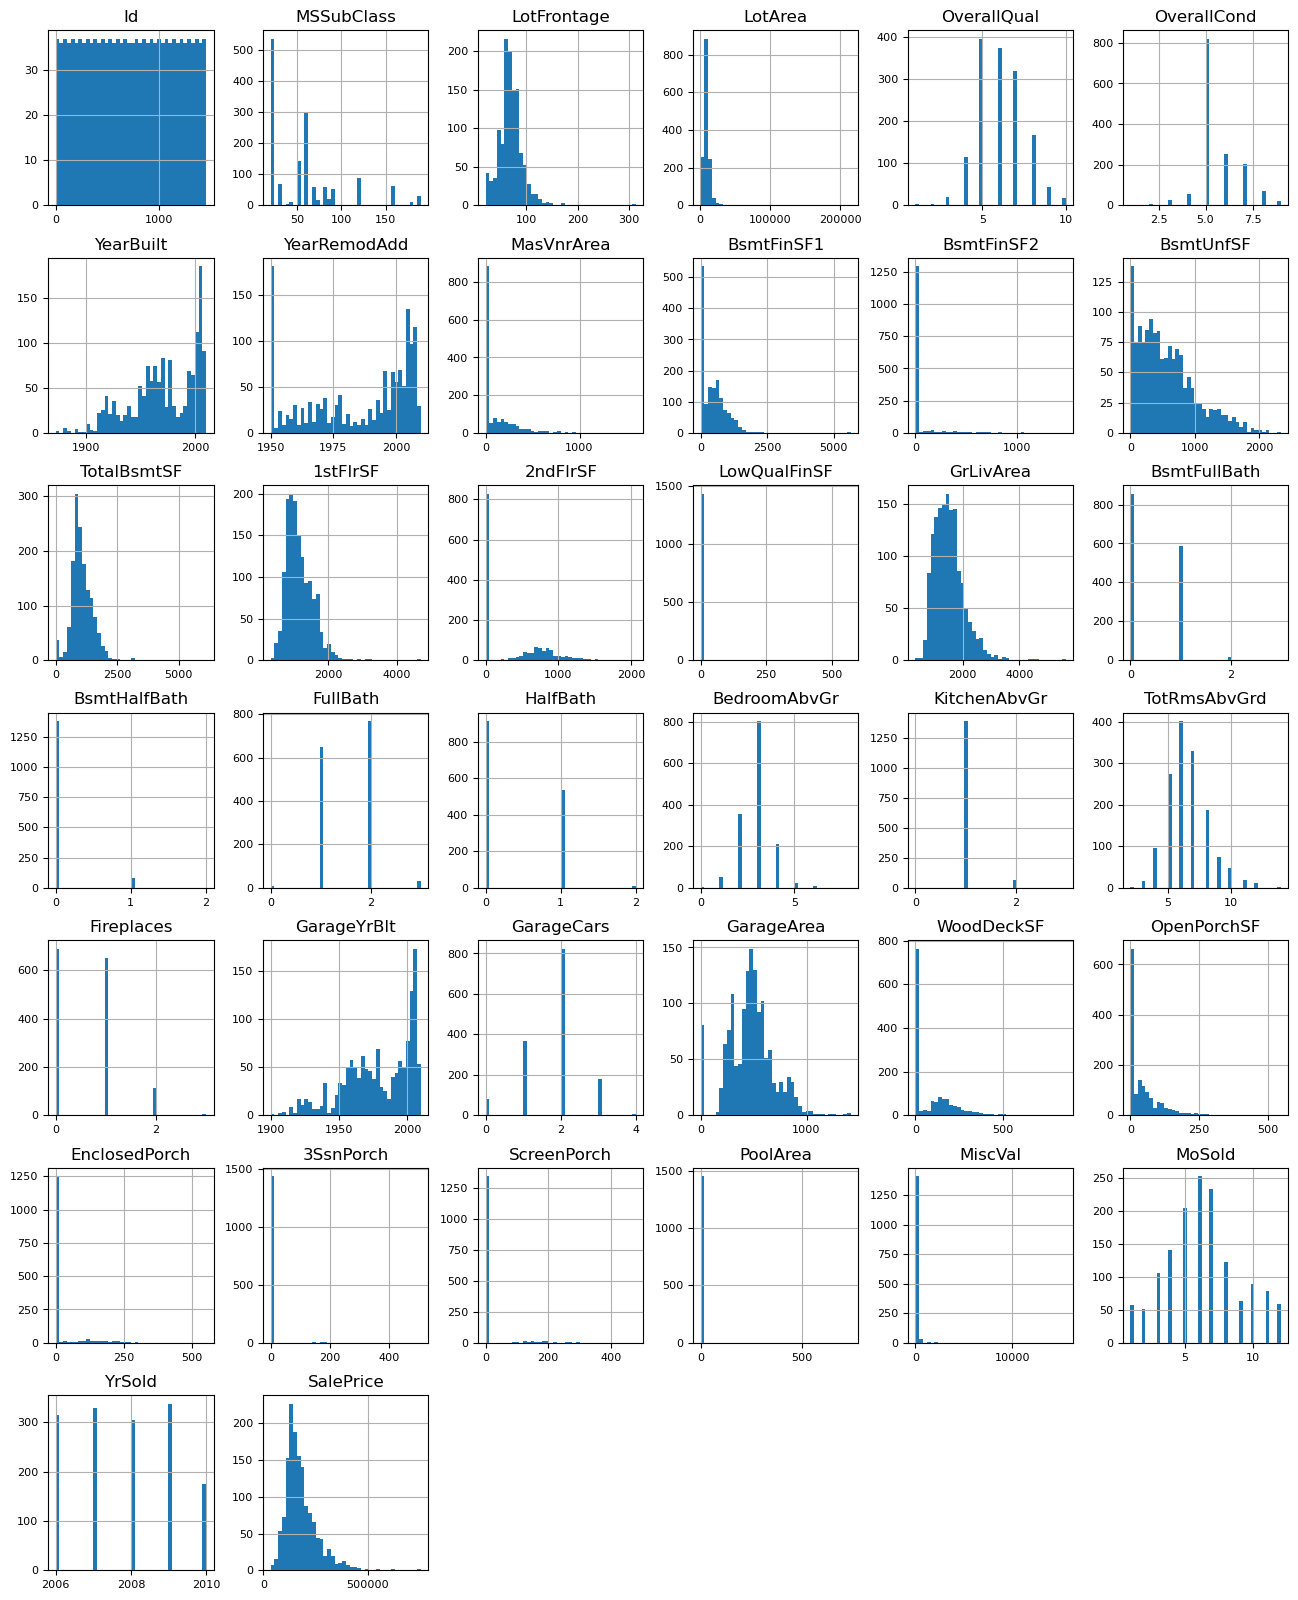

In [13]:
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8);

Text(0.5, 1.0, 'Distribution of SalePrice/Electrical Ratio')

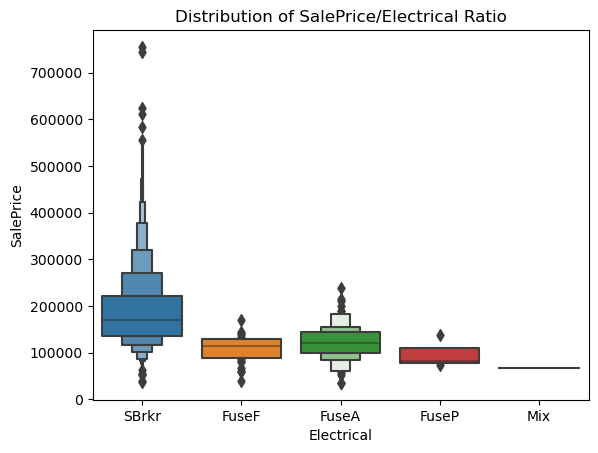

In [14]:
sns.boxenplot(x='Electrical' , y= 'SalePrice' , data=df)
plt.title("Distribution of SalePrice/Electrical Ratio")

In [15]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

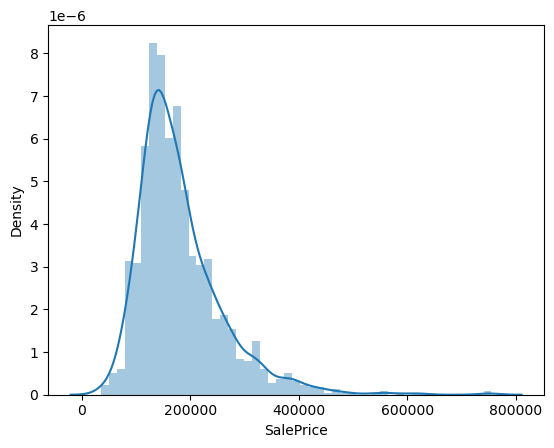

In [16]:
sns.distplot(df['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


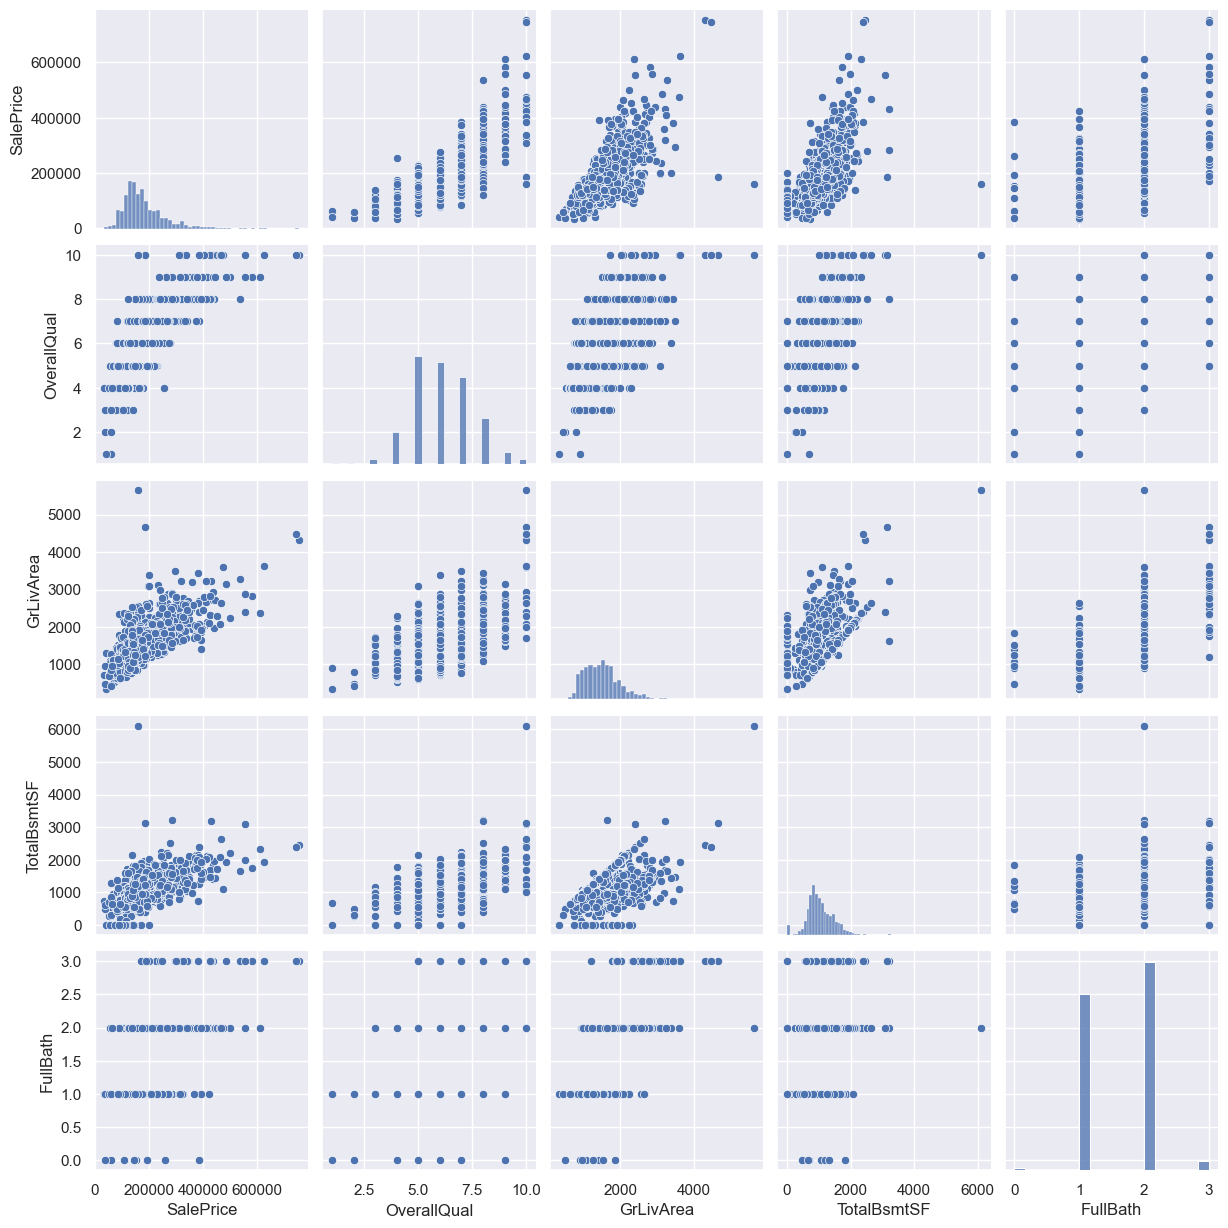

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df[cols], size=2.5)
plt.show()

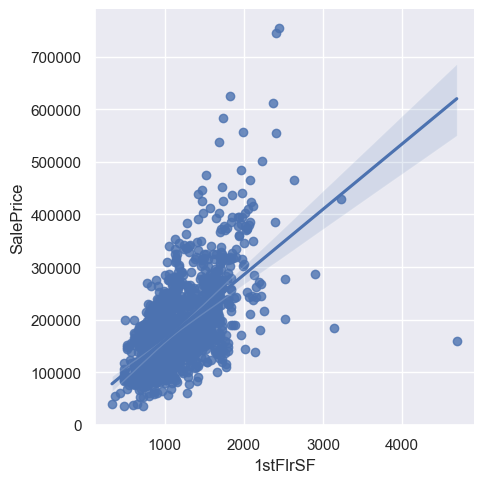

In [18]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=df)

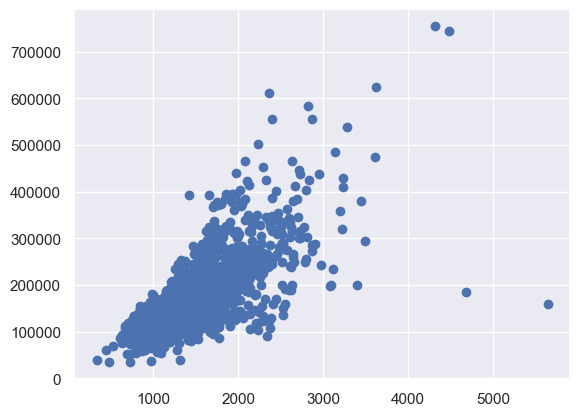

In [19]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = df)

# Linear Regression Modelling

In [28]:
train = pd.read_csv(r"C:\Users\Aryaa Ishika\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [29]:
test= pd.read_csv(r"C:\Users\Aryaa Ishika\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [32]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1312,1313,60,RL,NaN,9572,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1408,1409,70,RM,60.0,7740,Pave,NaN,Reg,Lvl,AllPub,...,168,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1165,1166,20,RL,79.0,9541,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,New,Partial
1346,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
399,400,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
75,76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,11,2009,WD,Normal
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [41]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
y = np.log(train.SalePrice)
X = df.drop(['SalePrice', 'Id'], axis=1)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [59]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [60]:
model = lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

In [61]:
print (model.score(X_test, y_test))

NameError: name 'model' is not defined

In [62]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [63]:
from sklearn.metrics import mean_squared_error
print ( mean_squared_error(y_test, predictions))

NameError: name 'predictions' is not defined

In [64]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

NameError: name 'predictions' is not defined

In [65]:
final_predictions = np.exp(predictions)

NameError: name 'predictions' is not defined

In [66]:
submission['SalePrice'] = final_predictions

NameError: name 'final_predictions' is not defined

In [67]:
print(submission.head())

NameError: name 'submission' is not defined